In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [3]:
def null_columns(df):
    
    null_columns = df.columns[df.isnull().any()]
    null_df = pd.DataFrame(df[null_columns].isnull().sum()).reset_index()
    null_df = null_df.rename(columns={'index':'Feature',0:'Count'})
    
    
    
    return null_df.sort_values('Count', ascending = False)

In [4]:
cali_metros_11 = pd.read_csv('data/cali_metros_11.csv')
cali_metros_12 = pd.read_csv('data/cali_metros_12.csv')
cali_metros_13 = pd.read_csv('data/cali_metros_13.csv')
cali_metros_14 = pd.read_csv('data/cali_metros_14.csv')
cali_metros_15 = pd.read_csv('data/cali_metros_15.csv')
cali_metros_16 = pd.read_csv('data/cali_metros_16.csv')
cali_metros_17 = pd.read_csv('data/cali_metros_17.csv')
cali_metros_18 = pd.read_csv('data/cali_metros_18.csv')

In [5]:
cali_metros_11 = cali_metros_11.dropna(subset=['Metro'])
cali_metros_12 = cali_metros_12.dropna(subset=['Metro'])
cali_metros_13 = cali_metros_13.dropna(subset=['Metro'])
cali_metros_14 = cali_metros_14.dropna(subset=['Metro'])
cali_metros_15 = cali_metros_15.dropna(subset=['Metro'])
cali_metros_16 = cali_metros_16.dropna(subset=['Metro'])
cali_metros_17 = cali_metros_17.dropna(subset=['Metro'])
cali_metros_18 = cali_metros_18.dropna(subset=['Metro'])

In [6]:
lst_dfs = [cali_metros_11, cali_metros_12,
           cali_metros_13, cali_metros_14,
           cali_metros_15, cali_metros_16,
           cali_metros_17, cali_metros_18]

In [7]:
for i in lst_dfs:
    print(i.shape)

(1133, 260)
(1133, 260)
(1133, 260)
(1133, 260)
(1133, 254)
(1133, 260)
(1133, 260)
(1133, 248)


In [8]:
column_names = list(cali_metros_11.columns)

In [9]:
cali_concat = pd.concat(lst_dfs, ignore_index=True)

In [10]:
cali_full = pd.pivot_table(cali_concat, values=column_names, index = ['Date', 'RegionName'])

In [11]:
cali_full = cali_full.drop(columns=['RegionID',
                                    'SizeRank',
                                    'median_rent',
                                    'gini_index',
                                    'percent_income_spent_on_rent',
                                    'renter_occupied_housing_units_paying_cash_median_gross_rent'])

In [12]:
null_columns(cali_full).head(10)

,Feature,Count
203,pop_divorced,4536
208,pop_widowed,4536
207,pop_separated,4536
197,pop_15_and_over,4536
206,pop_now_married,4536
205,pop_never_married,4536
201,pop_5_years_over,3404
225,speak_spanish_at_home,3404
224,speak_only_english_at_home,3404
226,speak_spanish_at_home_low_english,3404


In [13]:
# cali_full.loc[(2011,90001)]

In [14]:
perc = 5.0
min_count =  int(((100-perc)/100)*cali_full.shape[0] + 1)

In [15]:
cali_cleaned = cali_full.dropna(axis=1, thresh = min_count)

In [16]:
null_columns(cali_cleaned).head(10)

,Feature,Count
5,avg_rent,94
176,owner_occupied_housing_units_lower_value_quartile,23
156,median_year_structure_built,18
155,median_income,14
178,owner_occupied_housing_units_upper_value_quartile,12
177,owner_occupied_housing_units_median_value,11
0,amerindian_pop,8
139,male_45_to_64,8
140,male_50_to_54,8
141,male_55_to_59,8


In [17]:
cali_cleaned

amerindian_pop  armed_forces  asian_male_45_54  \
Date RegionName                                                   
2011 90001                 19.0           0.0               0.0   
     90002                 20.0           0.0               5.0   
     90003                236.0          17.0              39.0   
     90004                 76.0          36.0            1199.0   
     90005                109.0          17.0            1117.0   
...                         ...           ...               ...   
2018 96145                 16.0           0.0               0.0   
     96146                  0.0           0.0               0.0   
     96148                  0.0           0.0               0.0   
     96150                 61.0          88.0              46.0   
     96161                  9.0           0.0               5.0   

                 asian_male_55_64  asian_pop     avg_rent  bachelors_degree_2  \
Date RegionName                                                                 
2011 90001                    0.0       48.0  1706.083333               912.0   
     90002                    0.0       65.0  1778.083333               720.0   
     90003                    0.0      115.0  1629.833333              1255.0   
     90004                 1085.0    17154.0  2257.833333             10144.0   
     90005                  703.0    12739.0  2213.500000              5335.0   
...                           ...        ...          ...                 ...   
2018 96145                    0.0        0.0  2942.000000               691.0   
     96146                    0.0        0.0  2375.111111               324.0   
     96148                    0.0        0.0  2276.583333               112.0   
     96150                   66.0     1352.0  1946.750000              4364.0   
     96161                   66.0      271.0  2400.416667              4484.0   

                 bachelors_degree_or_higher_25_64  black_male_45_54  \
Date RegionName                                                       
2011 90001                                 1148.0             210.0   
     90002                                  895.0             745.0   
     90003                                 1521.0            1043.0   
     90004                                11525.0             159.0   
     90005                                 6329.0             388.0   
...                                           ...               ...   
2018 96145                                  706.0               0.0   
     96146                                  352.0               0.0   
     96148                                   99.0               0.0   
     96150                                 4948.0              10.0   
     96161                                 5245.0               0.0   

                 black_male_55_64  black_pop  children  \
Date RegionName                                          
2011 90001                  193.0     4819.0   18676.0   
     90002                  399.0    12716.0   17282.0   
     90003                  651.0    16430.0   24017.0   
     90004                  145.0     1973.0   13302.0   
     90005                   90.0     2314.0    8902.0   
...                           ...        ...       ...   
2018 96145                    0.0       28.0     325.0   
     96146                    0.0        0.0     147.0   
     96148                    0.0        0.0     167.0   
     96150                    7.0      306.0    5089.0   
     96161                    0.0       55.0    4068.0   

                 children_in_single_female_hh  civilian_labor_force  \
Date RegionName                                                       
2011 90001                             5312.0               23559.0   
     90002                             6713.0               17424.0   
     90003                            10401.0               25761.0   
     90004                             3906.0            

In [18]:
cali_cleaned = cali_cleaned.dropna()

In [19]:
zip_codes = list(np.sort(cali_concat['RegionName'].unique()))

In [20]:
zip_90001 = cali_cleaned[cali_cleaned.index.get_level_values("RegionName") == 90001]
zip_90001_rent = zip_90001['avg_rent']
zip_90001_rent = zip_90001_rent.reset_index().drop(columns='RegionName')
zip_90001_rent['Date'] = pd.to_datetime(zip_90001_rent['Date'], format = '%Y')
zip_90001_rent = zip_90001_rent.set_index('Date')
zip_90001_rent

,avg_rent
Date,
2011-01-01,1706.083333
2012-01-01,1635.166667
2013-01-01,1724.333333
2014-01-01,1825.000000
2015-01-01,2049.500000
2016-01-01,2165.833333
2017-01-01,2281.666667
2018-01-01,2317.250000


In [31]:
#sea = seasonal_decompose(zip_90001_rent)
#sea.plot();

In [22]:
zip_90001

,,amerindian_pop,armed_forces,asian_male_45_54,asian_male_55_64,asian_pop,avg_rent,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_45_59_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,graduate_professional_degree,group_quarters,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,...,income_75000_99999,income_less_10000,income_per_capita,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,median_age,median_income,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,one_parent_families_with_young_children,other_race_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,pop_16_over,pop_25_64,pop_determined_poverty_status,pop_in_labor_force,population_1_year_and_over,population_3_years_over,poverty,rent_10_to_15_percent,rent_15_to_20_percent,rent_20_to_25_percent,rent_25_to_30_percent,rent_30_to_35_percent,rent_35_to_40_percent,rent_40_to_50_percent,rent_burden_not_computed,rent_over_50_percent,rent_under_10_percent,sales_office_employed,some_college_and_associates_degree,three_cars,total_pop,two_cars,two_or_more_races_pop,two_pare

In [58]:
from sklearn.linear_model import Lasso, LinearRegression

In [24]:
X = cali_cleaned.drop(columns='avg_rent')
y = cali_cleaned['avg_rent']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)
# Setting max_iter because it doesn't coverge without it
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0,1,21)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

/var/folders/7l/d0fjkp5s6wb4vlyfby7kw5h00000gn/T/ipykernel_2215/3070392060.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/Users/skippy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/skippy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279274476.58455336, tolerance: 447584.2556193865
  model = cd_fast.enet_coordinate_descent(


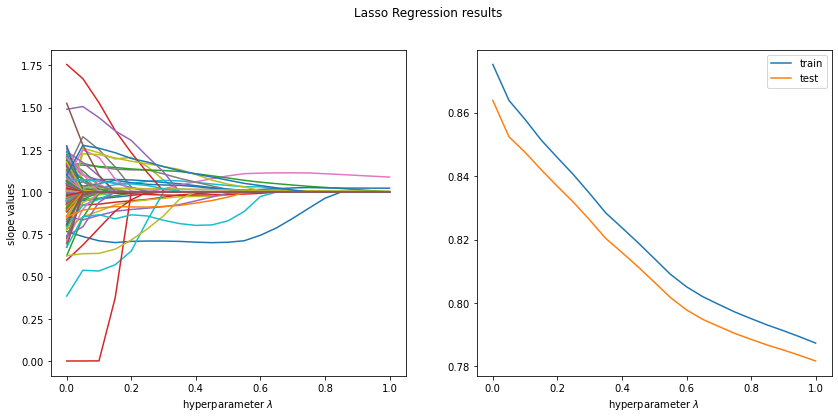

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [52]:
R2_lasso.sort_values('test', ascending = False).head(3)

,train,test
0.00,0.875208,0.863871
0.05,0.863886,0.852412
0.10,0.857860,0.847517


In [49]:
np.linspace(0,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [57]:
coefs_lasso.loc[0.65,coefs_lasso.loc[0.65,:] != 0].sort_values(ascending=False)

commuters_by_public_transportation                   0.046719
dwellings_1_units_attached                           0.021013
walked_to_work                                       0.010777
employed_science_management_admin_waste              0.008394
commute_45_59_mins                                   0.008279
income_per_capita                                    0.003806
dwellings_50_or_more_units                           0.001646
owner_occupied_housing_units_lower_value_quartile    0.001165
owner_occupied_housing_units_upper_value_quartile    0.000560
owner_occupied_housing_units_median_value            0.000547
housing_built_2000_to_2004                          -0.000247
amerindian_pop                                      -0.103504
Name: 0.65, dtype: float64

In [59]:
model = LinearRegression()

In [30]:
#sns.set(rc = {'figure.figsize':(15,8)})
#sns.scatterplot(data=cali_cleaned, x="million_dollar_housing_units", y="avg_rent")